In [0]:
!pip install emoji

     |████████████████████████████████| 51kB 3.3MB/s 
  Created wheel for emoji: filename=emoji-0.5.3-cp36-none-any.whl size=42175 sha256=35c7b11137ae5a46be7206f42e6b574c96334ca720382595a1998eb19b0228b7
  Stored in directory: /root/.cache/pip/wheels/86/09/26/f944015841423cd516e8a97f30e29be59e53461aea8b7d3458
Successfully built emoji


In [0]:
import emoji

In [0]:
emoji.EMOJI_ALIAS_UNICODE

{':1st_place_medal:': '🥇',
 ':2nd_place_medal:': '🥈',
 ':3rd_place_medal:': '🥉',
 ':AB_button_(blood_type):': '🆎',
 ':ATM_sign:': '🏧',
 ':A_button_(blood_type):': '🅰',
 ':Afghanistan:': '🇦🇫',
 ':Albania:': '🇦🇱',
 ':Algeria:': '🇩🇿',
 ':American_Samoa:': '🇦🇸',
 ':Andorra:': '🇦🇩',
 ':Angola:': '🇦🇴',
 ':Anguilla:': '🇦🇮',
 ':Antarctica:': '🇦🇶',
 ':Antigua_&_Barbuda:': '🇦🇬',
 ':Aquarius:': '♒',
 ':Argentina:': '🇦🇷',
 ':Aries:': '♈',
 ':Armenia:': '🇦🇲',
 ':Aruba:': '🇦🇼',
 ':Ascension_Island:': '🇦🇨',
 ':Australia:': '🇦🇺',
 ':Austria:': '🇦🇹',
 ':Azerbaijan:': '🇦🇿',
 ':BACK_arrow:': '🔙',
 ':B_button_(blood_type):': '🅱',
 ':Bahamas:': '🇧🇸',
 ':Bahrain:': '🇧🇭',
 ':Bangladesh:': '🇧🇩',
 ':Barbados:': '🇧🇧',
 ':Belarus:': '🇧🇾',
 ':Belgium:': '🇧🇪',
 ':Belize:': '🇧🇿',
 ':Benin:': '🇧🇯',
 ':Bermuda:': '🇧🇲',
 ':Bhutan:': '🇧🇹',
 ':Bolivia:': '🇧🇴',
 ':Bosnia_&_Herzegovina:': '🇧🇦',
 ':Botswana:': '🇧🇼',
 ':Bouvet_Island:': '🇧🇻',
 ':Brazil:': '🇧🇷',
 ':British_Indian_Ocean_Territory:': '🇮🇴',
 ':British_Virgin_Is

In [0]:
emoji.emojize(':flushed_face:')

'😳'

In [0]:
print(emoji.emojize(":glass_of_milk:"))

🥛


In [0]:
from google.colab import files
uploads = files.upload()

Saving glove.6B.50d.txt.zip to glove.6B.50d.txt.zip


In [0]:
import pandas as pd

In [0]:
traindf = pd.read_csv('train_emoji.csv', header = None)
testdf = pd.read_csv('test_emoji.csv', header = None)

In [0]:
traindf.head()

,0,1,2,3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN


In [0]:
emoji_dict ={
    0: 'beating_heart',
    1: 'baseball',
    2: 'beaming_face_with_smiling_eyes',
    3: 'disappointed_face',
    4: 
}

In [0]:
XT = traindf[0]
YT = traindf[1]
print(XT.shape, YT.shape)


(132,) (132,)


In [0]:
def convertIntoList(sentences):
    total = sentences.shape[0]
    X = []
    for i in range(total):
        X.append(sentences[i].lower().split())
    
    return X

In [0]:
XT = convertIntoList(XT)

In [0]:
XT[0]

['never', 'talk', 'to', 'me', 'again']

In [0]:
!wget https://www.kaggle.com/watts2/glove6b50dtxt/downloads/glove.6B.50d.txt

--2019-08-04 10:03:49--  https://www.kaggle.com/watts2/glove6b50dtxt/downloads/glove.6B.50d.txt
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?returnUrl=%2Fwatts2%2Fglove6b50dtxt%2Fdata [following]
--2019-08-04 10:03:49--  https://www.kaggle.com/account/login?returnUrl=%2Fwatts2%2Fglove6b50dtxt%2Fdata
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘glove.6B.50d.txt’

glove.6B.50d.txt        [ <=>                ]   9.75K  --.-KB/s    in 0.01s   

2019-08-04 10:03:49 (962 KB/s) - ‘glove.6B.50d.txt’ saved [9980]



/bin/bash: line 0: cd: 1: Not a directory


In [0]:
!ls

 1		    glove6b50dtxt.zip  'test_emoji (1).csv'   train_emoji.csv
 glove.6B.50d.txt   sample_data         test_emoji.csv


In [0]:
import numpy as np

def glove_vec(path):
    with open(path, 'r', encoding='utf-8') as f:
        words = set()
        word_vec = {}
        for line in f:
            line = line.strip().split()
            key = line[0]
            words.add(key)
            val = np.array(line[1:], dtype = np.float64)
            word_vec[key] = val

        word2idx = {}
        idx2word = {}

        for i, w in enumerate(sorted(words)):
            word2idx = i
            idx2word = w

    return word_vec, word2idx, idx2word

In [0]:
glove_vec('./glove.6B.50d.txt')

ValueError: ignored

In [0]:
def getEmbeddingOutput(X):
    embedding_output = np.zeros((len(X), 10, 50))
    for ix in range(X.shape[0]):
        for jx in range(len(X[ix])):
            embedding_output[ix][jx] = word_vec[X[ix][jx]]
    
    return embedding_output

In [0]:
xT_processed = getEmbeddingOutput(XT)

In [0]:
from keras.models import Sequential
from keras.layers import *
from keras.utils import to_categorical


In [0]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(10,50)))
model.add(Dropout(0.4))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

In [0]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.fit(xT_processed, YT, epochs = 40, validation_split = 0.1)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=16, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=20, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 4th Convolutional Layer
model.add(Conv2D(filters=30, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(48,  input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
# model.add(Dropout(0.4))

# Output Layer
model.add(Dense(1))
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 54, 54, 16)        5824      
_________________________________________________________________
activation_6 (Activation)    (None, 54, 54, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 17, 17, 20)        38740     
_________________________________________________________________
activation_7 (Activation)    (None, 17, 17, 20)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 20)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 30)         

In [0]:
import cv2

train = []

for i in range(0,15000):
    img = cv2.imread('PATCHES/'+data['path'][i])
    img = cv2.resize(img, (224,224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train.append((img, data['label'][i]))

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)

In [0]:
print(y)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [0]:
from keras.models import model_from_json


json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Using TensorFlow backend.


In [0]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 38, 38, 16)        5824      
_________________________________________________________________
activation_1 (Activation)    (None, 38, 38, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 20)          38740     
_________________________________________________________________
activation_2 (Activation)    (None, 9, 9, 20)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 10)         

In [0]:
camera_1 = {
    'lot_1' : [(360, 160), (400, 199)], 
    'lot_2' : [(365, 289), (443, 366)],
    'lot_3' : [(464,347), (573, 452)],
    'lot_4' : [(111, 263), (165, 315)],
    'lot_5' : [(71, 227), (118, 273)],
    'lot_6' : [(41, 197), (79, 235)],
    'lot_7' : [(12,173), (48, 203)],
    'lot_8' : [(39, 98), (76, 134)],
}

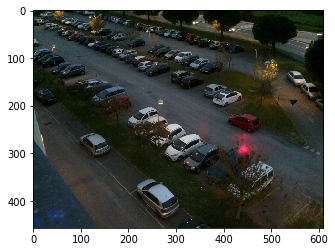

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#image = cv2.imread('camera 1_1.jpg')
image = cv2.imread('2015-11-16_1710.jpg')

image = cv2.resize(image, (610, 457))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


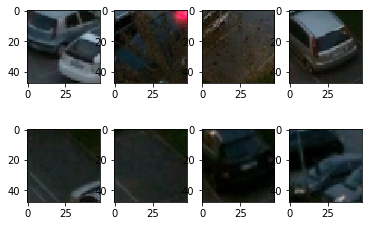

In [0]:
fig=plt.figure()
columns = 4
rows = 2

images = np.zeros((8, 48, 48, 3));

for no, v in enumerate(camera_1.values()):
    x1 = v[0][0] 
    x2 = v[1][0] 
    y1 = v[0][1] 
    y2 = v[1][1] 
        
    img = np.zeros((y2 - y1, x2 - x1, 3), dtype = 'uint8')
    
    for i in range(y1, y2):
        for j in range(x1, x2):
            img[i - y1][j - x1] = image[i][j]
    
    img = cv2.resize(img, (48, 48)) / 255
    images[no] = img
    fig.add_subplot(rows, columns, no + 1)
    plt.imshow(img)
    
plt.show()

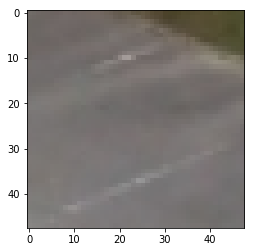

In [0]:
plt.imshow(images[0])

In [0]:
loaded_model.predict(images)

array([[0.75110143],
       [0.9999609 ],
       [1.        ],
       [1.        ],
       [0.99993503],
       [1.        ],
       [0.995222  ],
       [0.9999852 ]], dtype=float32)